***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize as células abaixo para importar as bibliotecas que precisar e para configurações gerais
#### <font color='red'>Sugestões: dplyr, ggplot2 etc.</font>

In [ ]:
library(dplyr)
library(ggplot2)

In [189]:
options(repr.plot.width = 9, repr.plot.height = 6)

formatos =     theme(
        plot.title = element_text(size = 14, hjust = 0.5),
        axis.title.y = element_text(size = 12, vjust = +0.2),
        axis.title.x = element_text(size = 12, vjust = -0.2),
        axis.text.y = element_text(size = 10),
        axis.text.x = element_text(size = 10)
    )

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [190]:
dataset = read.csv('data/dados.csv')

### Visualize o conteúdo do DataFrame

In [94]:
dataset

UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura
<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
11,0,23,8,12,800,1.603808
11,1,23,2,12,1150,1.739790
11,1,35,8,15,880,1.760444
11,0,46,2,6,3500,1.783158
11,1,47,8,9,150,1.690631
11,1,34,8,12,790,1.637906
11,0,57,8,12,3150,1.570078
11,1,60,8,12,1700,1.608495
11,1,50,4,14,1800,1.780329


### Para avaliar o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [108]:

classes = c(
  min(dataset$Renda), 
  2*788, 
  5*788, 
  15*788, 
  25*788, 
  max(dataset$Renda))
  classes

[1]      0   1576   3940  11820  19700 200000

### 2º Definir os labels das classes

In [109]:
labels = c('E','D','C','B','A')

### 3º Construir a coluna de frequências

In [110]:
frequencia = table(
cut(
  x = dataset$Renda,
  breaks = classes,
  labels = labels,
  include.lowest = FALSE
)
)
frequencia


    E     D     C     B     A 
46888 18602  7241   822   420 

### 4º Construir a coluna de percentuais

In [111]:
frequencia_perc = prop.table(frequencia)*100
frequencia_perc


         E          D          C          B          A 
63.3852892 25.1470131  9.7887067  1.1112163  0.5677747 

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [112]:
dist_freq_var_qt_renda = cbind("Frequencia" = frequencia, "Frequencia_Perc" = frequencia_perc)
dist_freq_var_qt_renda

,Frequencia,Frequencia_Perc
E,46888,63.3852892
D,18602,25.1470131
C,7241,9.7887067
B,822,1.1112163
A,420,0.5677747


In [113]:
dist_freq_var_qt_renda[
  order(row.names(dist_freq_var_qt_renda)),
]

,Frequencia,Frequencia_Perc
A,420,0.5677747
B,822,1.1112163
C,7241,9.7887067
D,18602,25.1470131
E,46888,63.3852892


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

#### <font color='red'>Lembre-se de transformar a matriz de resultados em um data frame.</font>

In [114]:
bar_chart_renda = data.frame(dist_freq_var_qt_renda)
bar_chart_renda

,Frequencia,Frequencia_Perc
,<dbl>,<dbl>
E,46888,63.3852892
D,18602,25.1470131
C,7241,9.7887067
B,822,1.1112163
A,420,0.5677747


Warning message:
“Use of `bar_chart$Frequencia` is discouraged. Use `Frequencia` instead.”


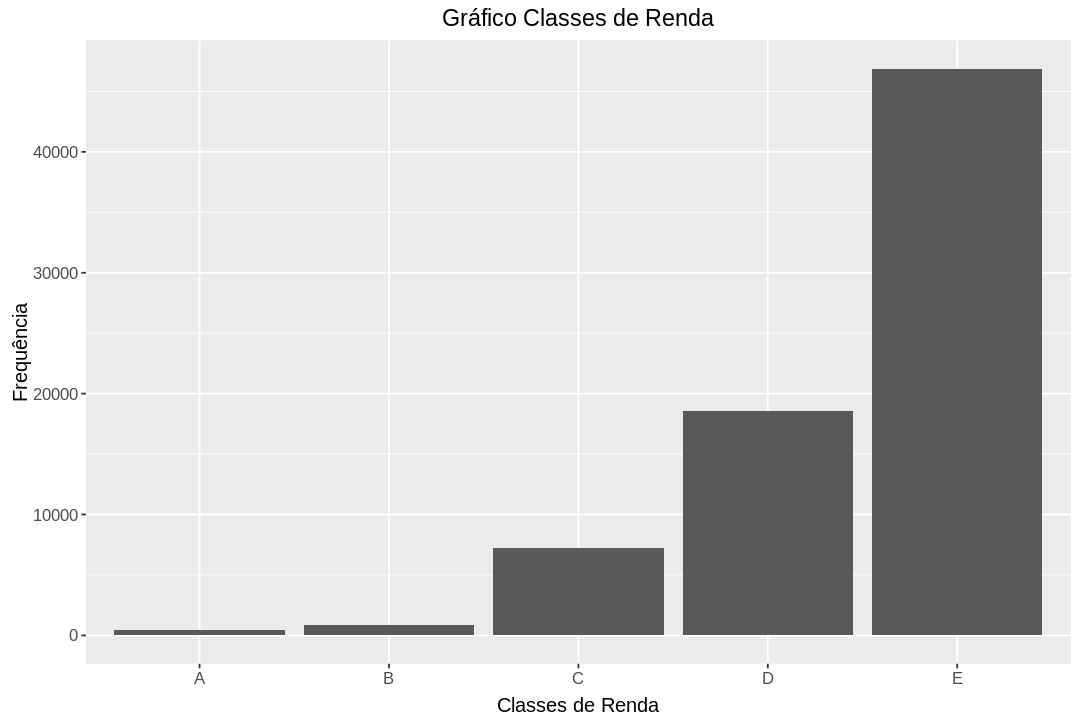

In [115]:
ggplot(bar_chart_renda, aes(x = row.names(bar_chart_renda), y = bar_chart$Frequencia)) + 
    geom_bar(stat = "identity") +  #usa o valor que esta na barra. Se 'bin' = usa a frequencia da classe
    ylab("Frequência") + 
    xlab("Classes de Renda") + 
    ggtitle('Gráfico Classes de Renda') +
    formatos

> ### Conclusões

O gráfico é assimétrico à direita, indicando que muita gente ganha pouco e pouca gente ganha muito.

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

In [ ]:
#Variaveis quantitativas = IDADE, ALTURA  e RENDA 
#obs: IDADE vira qualitativa quando representada em faixas de idade

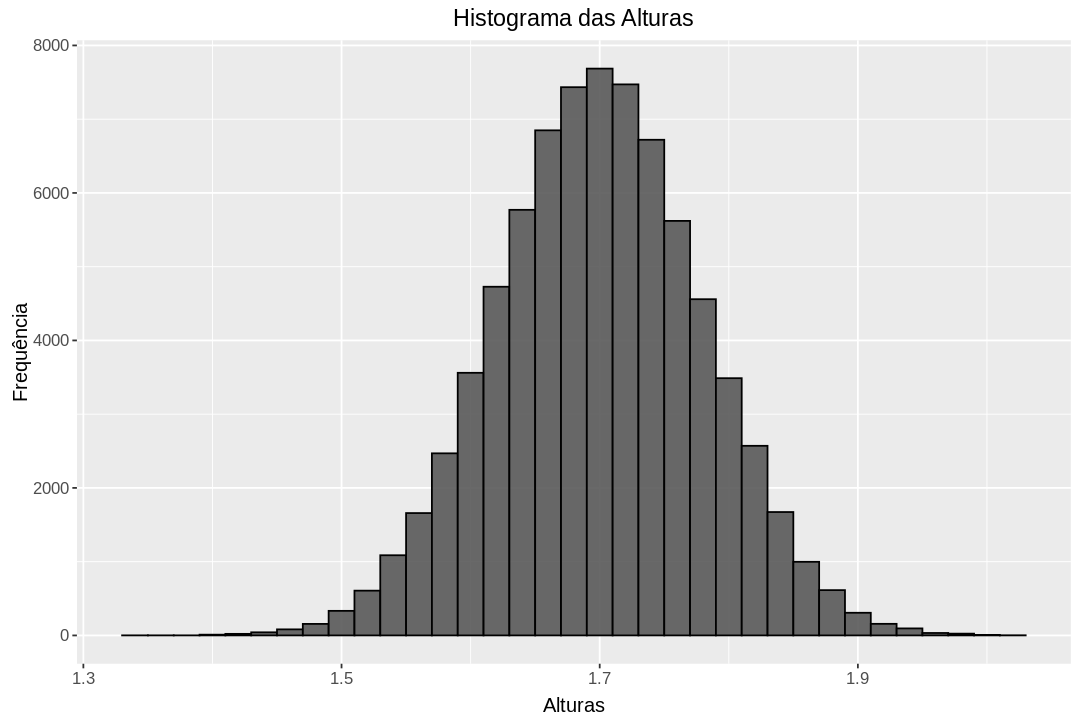

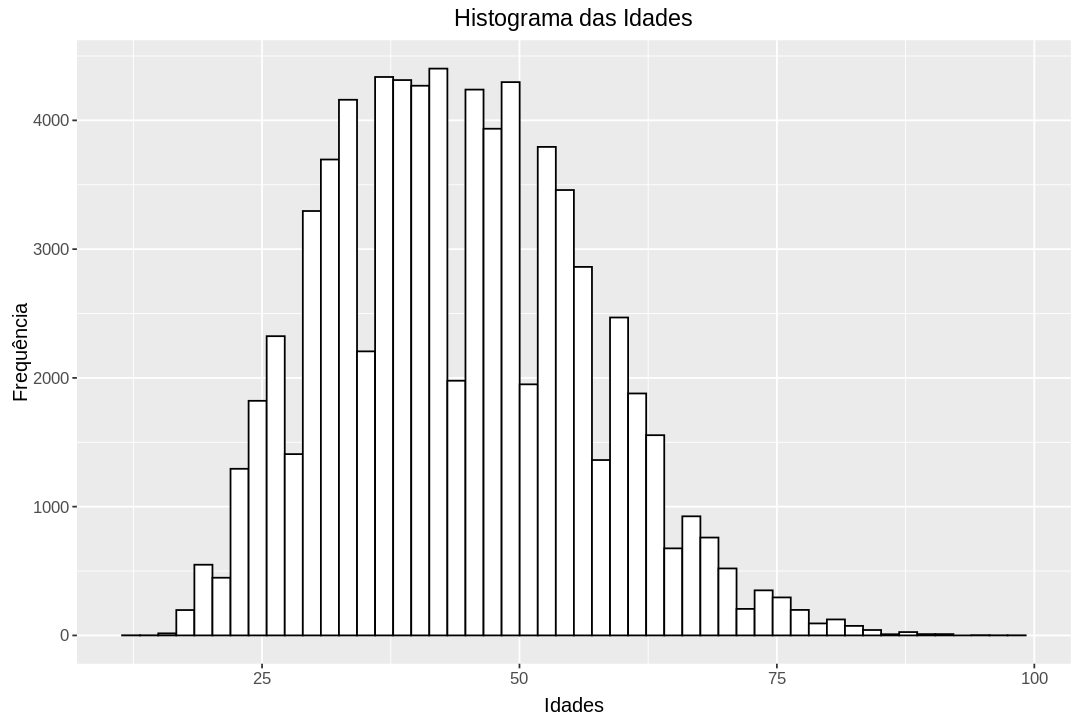

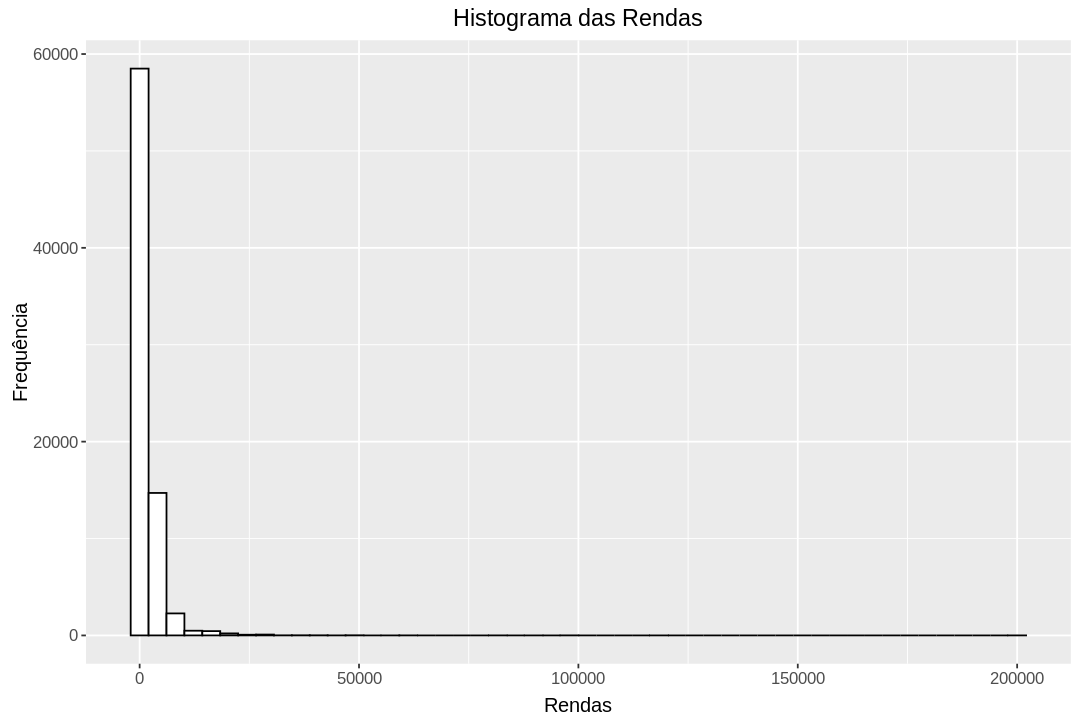

In [129]:
#variavel ALTURA

#HISTOGRAMA, SEM AGRUPAR ALTURAS EM CLASSES
ggplot(dataset, aes(x = Altura)) + 
    geom_histogram(binwidth = 0.02, color = "black", alpha = 0.9) + 
    ylab("Frequência") + 
    xlab("Alturas") + 
    ggtitle('Histograma das Alturas') +
    formatos

#variavel IDADE
ggplot(dataset, aes(x = Idade)) + 
    geom_histogram(bins=50, color="black", fill="white") + 
    ylab("Frequência") + 
    xlab("Idades") + 
    ggtitle('Histograma das Idades') +
    formatos

#variavel RENDA
ggplot(dataset, aes(x = Renda)) + 
    geom_histogram(bins=50, color="black", fill="white") + 
    ylab("Frequência") + 
    xlab("Rendas") + 
    ggtitle('Histograma das Rendas') +
    formatos    

> ### Conclusões

Sobre a variável ALTURA = a mais comum é aproximadamente 1.70m. A distribuição é normal. 

Quanto à IDADE, me parece bem variável.

Enquanto a variável RENDA é assimétrica à direita.

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

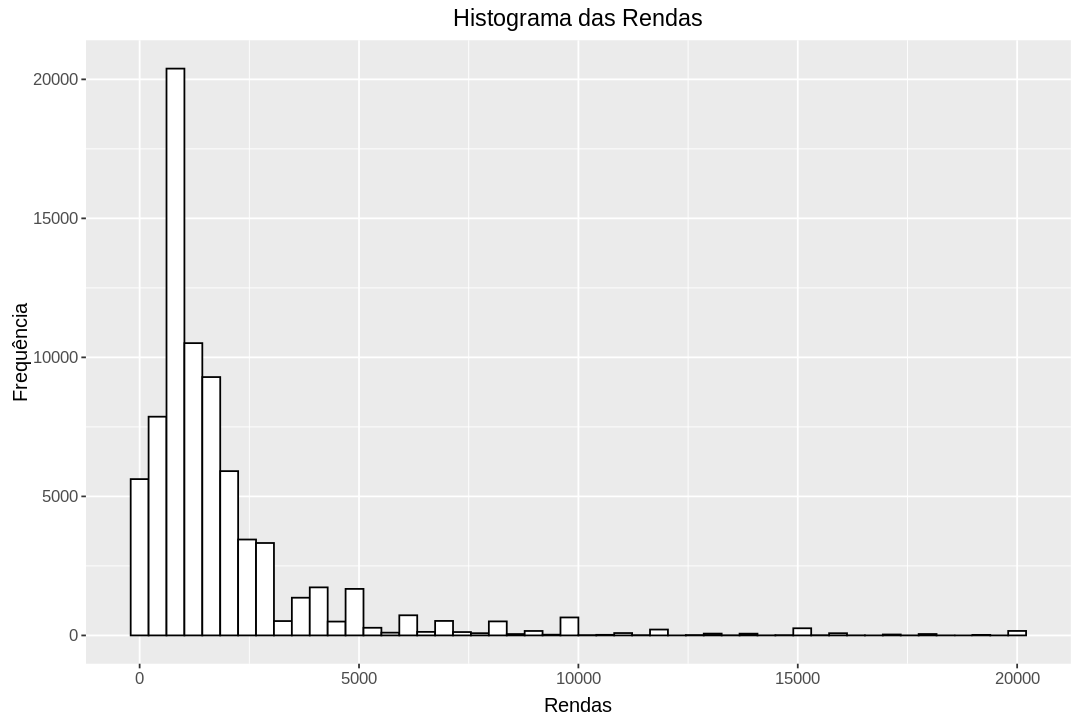

In [130]:
ggplot(dataset[dataset$Renda<=20000,], aes(x = Renda)) + 
    geom_histogram(bins=50, color="black", fill="white") + 
    ylab("Frequência") + 
    xlab("Rendas") + 
    ggtitle('Histograma das Rendas') +
    formatos    

### Construa uma tabela de frequências e uma com os percentuais cruzado das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os vetores abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [131]:
sexo = c(
    'Masculino', 
    'Feminino'
)
cor = c(
    'Indígena', 
    'Branca', 
    'Preta', 
    'Amarela', 
    'Parda'
)
anos_de_estudo = c(
    'Sem instrução e menos de 1 ano', 
    '1 ano', 
    '2 anos', 
    '3 anos', 
    '4 anos', 
    '5 anos', 
    '6 anos', 
    '7 anos', 
    '8 anos', 
    '9 anos', 
    '10 anos', 
    '11 anos', 
    '12 anos', 
    '13 anos', 
    '14 anos', 
    '15 anos ou mais', 
    'Não determinados'
)

In [146]:
#VARIAVEIS QUALITATIVAS 
#SEXO = NOMINAL
#COR = NOMINAL
#ANOS DE ESTUDO = ORDINAL

frequencia = table(dataset$Sexo, dataset$Cor)

rownames(frequencia) = sexo
colnames(frequencia) = cor
frequencia = cbind(frequencia)

frequencia

,Indígena,Branca,Preta,Amarela,Parda
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [147]:
frequencia_perc = prop.table(frequencia)*100
frequencia_perc

,Indígena,Branca,Preta,Amarela,Parda
Masculino,0.3331598,28.88339,7.160333,0.3058303,32.61713
Feminino,0.1314420,12.52082,3.759761,0.1522644,14.13587


> ### Conclusões

Escreva suas conclusões aqui...

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritmética

In [148]:
mean(dataset$Renda)

[1] 2000.383

### Obtenha a mediana

In [149]:
median(dataset$Renda)

[1] 1200

### Obtenha a moda

In [160]:
fmoda = function(x){
  freq = table(x) # agrupa os dados por frequencia de ocorrencia

  # [freq == max(freq)] exibe apenas elementos com maior freq
  # names(freq) exibe apenas o nome do elemento
  
  return(names(freq)[freq == max(freq)])
}

In [161]:
fmoda(dataset$Renda)

[1] "788"

### Obtenha a variância

In [163]:
variancia = var(dataset$Renda)
variancia

[1] 11044906

### Obtenha o desvio-padrão

In [164]:
desvio = sd(dataset$Renda)
desvio

[1] 3323.388

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize *tapply* com as funções *mean*, *median* e *max*</font>

In [168]:
media = tapply(
  dataset$Renda,
  list(dataset$Sexo, dataset$Cor),
  mean
)

rownames(media) = sexo
colnames(media) = cor

media

,Indígena,Branca,Preta,Amarela,Parda
Masculino,1081.711,2925.744,1603.862,4758.251,1659.577
Feminino,2464.386,2109.867,1134.596,3027.342,1176.759


In [169]:
mediana = tapply(
  dataset$Renda,
  list(dataset$Sexo, dataset$Cor),
  median
)

rownames(mediana) = sexo
colnames(mediana) = cor

mediana

,Indígena,Branca,Preta,Amarela,Parda
Masculino,797.5,1700,1200,2800,1200
Feminino,788.0,1200,800,1500,800


In [171]:
maximo = tapply(
  dataset$Renda,
  list(dataset$Sexo, dataset$Cor),
  max
)

rownames(maximo) = sexo
colnames(maximo) = cor

maximo

,Indígena,Branca,Preta,Amarela,Parda
Masculino,10000,200000,50000,50000,100000
Feminino,120000,100000,23000,20000,30000


> ### Conclusões

A mulher INDIGENA é a única que tem uma média de renda maior que dos homens. Talvez isso se explica ao comparar a mulher indígena que tem maior renda (120.000,00) e o homem indígena que tem maior renda (10.000,00). A mulher ganha muito mais que o homem. Porém, quando analisamos a mediana vemos que a renda da mulher é praticamente igual a do home INDIGENA.

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize *tapply* com as funções *var* e *sd*</font>

In [172]:
variancia = tapply(
  dataset$Renda,
  list(dataset$Sexo, dataset$Cor),
  var
)

rownames(variancia) = sexo
colnames(variancia) = cor

variancia

,Indígena,Branca,Preta,Amarela,Parda
Masculino,1449841,22570023,3749294,32957070,5345747
Feminino,142981765,10569087,1821960,13921657,2547960


In [173]:
desvio = tapply(
  dataset$Renda,
  list(dataset$Sexo, dataset$Cor),
  sd
)

rownames(desvio) = sexo
colnames(desvio) = cor

desvio

,Indígena,Branca,Preta,Amarela,Parda
Masculino,1204.093,4750.792,1936.309,5740.825,2312.087
Feminino,11957.498,3251.013,1349.800,3731.174,1596.233


> ### Conclusões

A maior dispersão ocorre com a renda das mulheres indígenas. Ou seja, há uma grande diferença entre as rendas mínimas e máximas.

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes;</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro *fill* da seguinte maneira: *aes(x = Cor, y = Renda, fill = Sexo)*.</font>

NULL

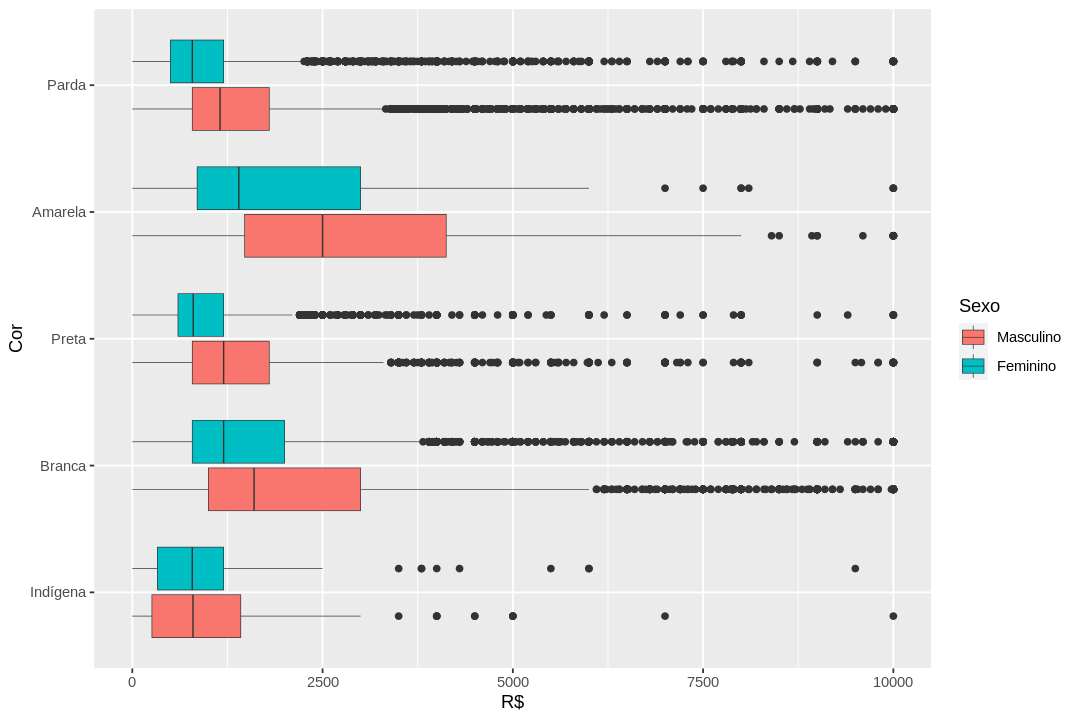

In [231]:
dataset$cat.Sexo = factor(dataset$Sexo)
levels(dataset$cat.Sexo) = sexo

dataset$cat.Cor = factor(dataset$Cor)
levels(dataset$cat.Cor) = cor

ggplot(data = dataset[dataset$Renda<=10000,], aes(x = cat.Cor, y = Renda, fill = cat.Sexo)) + 
    geom_boxplot(size = 0.2) + 
    coord_flip() +
    ylab("R$") + 
    xlab("Cor") + 
    guides(fill = guide_legend(title = 'Sexo'))
    ggtitle('Box-plot da Renda por cor e sexo') +
    formatos



> ### Conclusões

Fica claro que os homens ganham mais que a mulheres, em todas as classes de cores.


### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?

In [217]:
total_pessoas_sm = length(dataset$Renda[dataset$Renda<=788])
total_pessoas = length(dataset$Renda)

perc_pessoas_sm = (total_pessoas_sm/total_pessoas)*100
perc_pessoas_sm

[1] 28.86778

### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método *quantile()* para realizar esta análise.</font>

In [220]:
quantile(dataset$Renda, 0.99)

99% 
15000

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>

In [227]:
media = tapply(
  dataset$Renda,
  #Um vetor de variaveis categoricas que determina a estrutura dos dados 
  list(dataset$Anos.de.Estudo, dataset$Sexo), 
  mean
)

rownames(media) = anos_de_estudo
colnames(media) = sexo

media


,Masculino,Feminino
Sem instrução e menos de 1 ano,799.4946,516.2017
1 ano,895.6290,492.7720
2 anos,931.1790,529.9116
3 anos,1109.2039,546.8539
4 anos,1302.3293,704.2791
5 anos,1338.6532,781.3898
6 anos,1448.8754,833.7328
7 anos,1465.4979,830.7510
8 anos,1639.3967,933.6154
9 anos,1508.0389,868.0217


In [229]:
mediana = tapply(
  dataset$Renda,
  #Um vetor de variaveis categoricas que determina a estrutura dos dados 
  list(dataset$Anos.de.Estudo, dataset$Sexo), 
  median
)

rownames(mediana) = anos_de_estudo
colnames(mediana) = sexo

mediana

,Masculino,Feminino
Sem instrução e menos de 1 ano,700,390
1 ano,788,400
2 anos,788,450
3 anos,800,500
4 anos,1000,788
5 anos,1045,788
6 anos,1200,788
7 anos,1200,788
8 anos,1300,800
9 anos,1200,788


In [230]:
maximo = tapply(
  dataset$Renda,
  #Um vetor de variaveis categoricas que determina a estrutura dos dados 
  list(dataset$Anos.de.Estudo, dataset$Sexo), 
  max
)

rownames(maximo) = anos_de_estudo
colnames(maximo) = sexo

maximo

,Masculino,Feminino
Sem instrução e menos de 1 ano,30000,10000
1 ano,30000,2000
2 anos,40000,4000
3 anos,80000,3500
4 anos,50000,10000
5 anos,35000,8000
6 anos,25000,6000
7 anos,40000,9000
8 anos,30000,18000
9 anos,60000,20000


### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro *fill* da seguinte maneira: *aes(x = Anos.de.Estudo, y = Renda, fill = Sexo)*.</font>

NULL

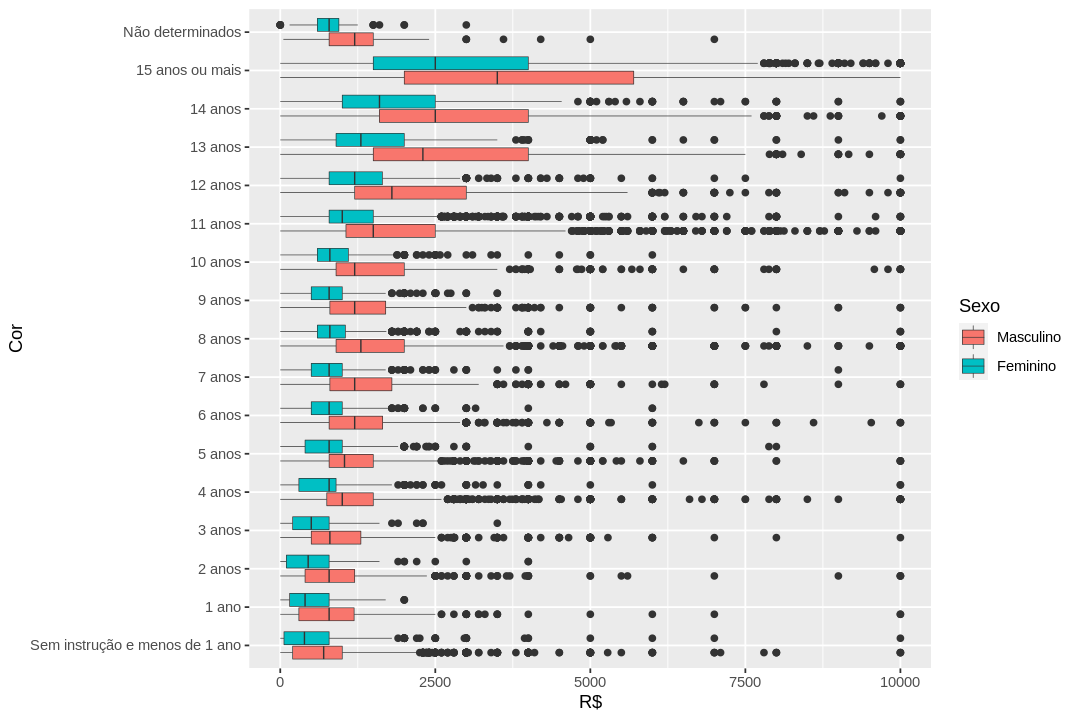

In [237]:
dataset$cat.Anos.de.Estudo = factor(dataset$Anos.de.Estudo)
levels(dataset$cat.Anos.de.Estudo) = anos_de_estudo

ggplot(data = dataset[dataset$Renda<=10000,], aes(x = cat.Anos.de.Estudo, y = Renda, fill = cat.Sexo)) + 
    geom_boxplot(size = 0.2) + 
    coord_flip() +
    ylab("R$") + 
    xlab("Cor") + 
    guides(fill = guide_legend(title = 'Sexo'))
    ggtitle('Box-plot da Renda por anos de estudo e sexo') +
    formatos


> ### Conclusões

Escreva suas conclusões aqui...